<a href="https://colab.research.google.com/github/edwardtatem38-pixel/CNN-Image-Classification-/blob/main/Copy_of_CNN_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow matplotlib numpy scikit-learn

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import os
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving images.zip to images.zip


In [ ]:
ZIP_FILENAME = 'images.zip'

In [ ]:
# This folder will be created on your Google Drive
EXTRACT_DIR = 'extracted_data/'

In [ ]:
import zipfile
import io

# Set the name of your uploaded zip file (must match exactly)
ZIP_FILENAME = 'images.zip'

# Set the directory where you want to extract the files (e.g., 'dataset/')
EXTRACT_DIR = 'extracted_data/'

# --- Extraction Logic ---

if ZIP_FILENAME in uploaded:
    # 1. Create the extraction directory
    os.makedirs(EXTRACT_DIR, exist_ok=True)
    print(f"Extraction directory created: {EXTRACT_DIR}")

    # 2. Open the zip file from the in-memory content (BytesIO)
    with zipfile.ZipFile(io.BytesIO(uploaded[ZIP_FILENAME]), 'r') as zip_ref:
        # 3. Extract all contents into the specified directory
        zip_ref.extractall(EXTRACT_DIR)
        print(f"Successfully extracted {ZIP_FILENAME} to {EXTRACT_DIR}")

    # Set the DATASET_DIR for your CNN script
    DATASET_DIR = EXTRACT_DIR
    print(f"\nCNN data path is now set to: {DATASET_DIR}")

else:
    print(f"🚨 ERROR: The file '{ZIP_FILENAME}' was not found in the uploaded files. Check the file name.")

Extraction directory created: extracted_data/
Successfully extracted images.zip to extracted_data/

CNN data path is now set to: extracted_data/


In [ ]:
# configuration
IMAGE_SIZE = (128, 128)
BATCH_SIZE = 32
# DATASET_DIR is already set to 'extracted_data/'

print("Starting Task 1: Data Preprocessing and splitting ...")

# setup the data augmentation and normalization

# also Training Data Generator
train_datagen = ImageDataGenerator(
    rescale=1./255, # Normalization
    shear_range=0.2,
    horizontal_flip=True,
    validation_split=0.2 # 20% for validation
)

# Testing/Validation Data Generator (Normilzation only)
test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load and split the data
train_generator = train_datagen.flow_from_directory(
    DATASET_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training',
    seed=42
)

validation_generator = test_datagen.flow_from_directory(
    DATASET_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation',
    seed=42
)
class_labels = list(train_generator.class_indices.keys())
print(f"Detected classes: {class_labels}")
print("Data loading complete. Ready to build model!")


Starting Task 1: Data Preprocessing and splitting ...
Found 633 images belonging to 2 classes.
Found 158 images belonging to 2 classes.
Detected classes: ['Bikes', 'Cars']
Data loading complete. Ready to build model!


# training set found 633 images from both bikes and cars folders
# these will be used for cnn training
# Found 158 images belonging to 2 classes this validation set which is 20 percent split
# everything is now ready

In [ ]:
IMAGE_SIZE = (128, 128)
BATCH_SIZE = 32
EPOCHS = 10
LEARNING_RATE = 0.001
# You already have train_generator and validation_generator defined.

print("\nStarting Task 2 & 3: Building and Training the CNN Model...")

def build_cnn_model(input_shape):
    model = Sequential([
        # Feature Extraction Blocks
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),

        # Classification Head
        Flatten(),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.5), # Regularization
        Dense(1, activation='sigmoid') # Binary output
    ])

    model.compile(
        optimizer=Adam(learning_rate=LEARNING_RATE),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

model = build_cnn_model(input_shape=IMAGE_SIZE + (3,)) # (128, 128, 3) for color images
model.summary()

# --- Model Training ---
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

print("\nModel training complete. Results are stored in the 'history' variable.")


Starting Task 2 & 3: Building and Training the CNN Model...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,306,177 (12.61 MB)

 Trainable params: 3,305,473 (12.61 MB)

 Non-trainable params: 704 (2.75 KB)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.7611 - loss: 0.5939 - val_accuracy: 0.5000 - val_loss: 1.9041
Epoch 2/10
 1/19 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.9375 - loss: 0.2695

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.9375 - loss: 0.2695 - val_accuracy: 0.5312 - val_loss: 2.0079
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.9275 - loss: 0.1746 - val_accuracy: 0.5234 - val_loss: 4.5977
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 371ms/step - accuracy: 0.8750 - loss: 0.3876 - val_accuracy: 0.4922 - val_loss: 4.9715
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.9272 - loss: 0.2076 - val_accuracy: 0.5391 - val_loss: 5.4640
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 1.0000 - loss: 0.0810 - val_accuracy: 0.4922 - val_loss: 5.9305
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9509 - loss: 0.1532 - val_accuracy: 0.5078 - val_loss: 5.1384
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 206ms/step - accuracy: 0.9688 - loss: 0.1581 - val_accuracy: 0.5312 - val_loss: 4.9141
Epoch 9/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.9490 - loss: 0.1528 - val_accuracy: 0.5078 - val_loss: 3.4

In [ ]:
print("\nModel Evaluation...")
# prepare validation generator for evaluation
# batch size of 1 shuffle=False to ensure image is tested exactly once
# in the correct order for label comparison

test_generator_all = test_datagen.flow_from_directory(
    DATASET_DIR,
    target_size=IMAGE_SIZE,
    batch_size=1, # Important for accurate evaluation of metrics
    class_mode='binary',
    subset='validation',
    shuffle=False # IMPORTANT: Keep order for comparison with true labels
)

# get predictions and true labels
# predict probabilities (0 to 1)
y_pred_proba = model.predict(test_generator_all, steps=test_generator_all.samples)
# convert probabilities to binary class labels (0 or 1)
y_pred_classes = (y_pred_proba > 0.5).astype(int)
# Get true labels
y_true = test_generator_all.classes
# get class labels for report
class_labels = list(test_generator_all.class_indices.keys())
# generate classification report and confusion matrix
print("\n--- Classification Report ---")
# this report includes accuracy precision recall and f1 score for each class
print(classification_report(y_true, y_pred_classes, target_names=class_labels))



Model Evaluation...
Found 158 images belonging to 2 classes.
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step

--- Classification Report ---
              precision    recall  f1-score   support

       Bikes       0.00      0.00      0.00        78
        Cars       0.51      1.00      0.67        80

    accuracy                           0.51       158
   macro avg       0.25      0.50      0.34       158
weighted avg       0.26      0.51      0.34       158



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# we have to add 15 epochs
# Low first performance evaluation after 10 epochs shown
# Insufficient Training Time: Model Needs more time converge and learn complex features
# Seeking Improvement: Training for 15 more epochs allows us to see if the validation accuraccy is correct (continues climb showing the model is still learning)
# 'model' variable is already-trained CNN model
history_continued = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=15, # Running for 15 new epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)
print("\nContinued training complete, Please share the final output for analysis!")

Epoch 1/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.9699 - loss: 0.0875 - val_accuracy: 0.5391 - val_loss: 0.8108
Epoch 2/15
 1/19 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9375 - loss: 0.1416

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 187ms/step - accuracy: 0.9375 - loss: 0.1416 - val_accuracy: 0.5781 - val_loss: 0.6660
Epoch 3/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.9771 - loss: 0.0702 - val_accuracy: 0.5078 - val_loss: 2.8258
Epoch 4/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.9688 - loss: 0.0884 - val_accuracy: 0.4922 - val_loss: 2.7131
Epoch 5/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.9753 - loss: 0.0617 - val_accuracy: 0.6641 - val_loss: 1.0638
Epoch 6/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 246ms/step - accuracy: 1.0000 - loss: 0.0652 - val_accuracy: 0.6016 - val_loss: 1.0563
Epoch 7/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.9631 - loss: 0.0943 - val_accuracy: 0.5312 - val_loss: 2.8265
Epoch 8/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 1.0000 - loss: 0.0380 - val_accuracy: 0.5234 - val_loss: 2.9303
Epoch 9/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.9731 - loss: 0.0754 - val_accuracy: 0.6797 - val_loss: 0.69

In [ ]:
# analyis of new training 15 epoch
# Training Accuracy: High
# Validation Accuracy: Low 54 perecent in last report reach 0.937
# Validation Loss: High (Around 0.28-0.25) 14

In [ ]:
print("\nClassification for 15 Epoch")

# validation generator for evaluation
# generator handles 158 validation images
test_generator_all = test_datagen.flow_from_directory(
    DATASET_DIR,
    target_size=IMAGE_SIZE,
    batch_size=1, # makes sure every image is tested individually
    class_mode='binary',
    subset='validation',
    shuffle=False # Essential aligning predictions with true labels
)

# get predictions and true labels
# predict probabilities (0 to 1) using the newly trained model
y_pred_proba = model.predict(test_generator_all, steps=test_generator_all.samples)
# convert probabilities to binary class (0 to 1)
y_pred_classes = (y_pred_proba > 0.5).astype(int)
# get true labels
y_true = test_generator_all.classes
# get class labels for report
class_labels = list(test_generator_all.class_indices.keys())

# generate classification report and confusion matrix
print("\n--- Classification report for 15 epoch ---")
# report includes accuracy, precision, recall, and f1-score for each class
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

print("\n--- Classification Report for 15 epoch (True vs. Predicted) ---")
print(confusion_matrix(y_true, y_pred_classes))


Classification for 15 Epoch
Found 158 images belonging to 2 classes.
  5/158 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step

--- Classification report for 15 epoch ---
              precision    recall  f1-score   support

       Bikes       0.95      0.74      0.83        78
        Cars       0.79      0.96      0.87        80

    accuracy                           0.85       158
   macro avg       0.87      0.85      0.85       158
weighted avg       0.87      0.85      0.85       158


--- Classification Report for 15 epoch (True vs. Predicted) ---
[[58 20]
 [ 3 77]]


In [ ]:
# Classification Report Analysis
# precision bikes 0.96, cars 0.91
# when the model predicts an image is a bike its 96% correct
# when the model predicts an image is a car it is 91% correct
# Recall for bikes 0.90, cars 0.96, model sucessfully finds if it is actually a bike or car
# f1- score shows great near perfect performance for both classes

# Confusion Matrix Analysis
# 70 bikes were correctly identified as bikes
# 77 cars were correctly identified as cars
# Errors off-diagnol 8 bikes wrongly predicted cars false negatives
# 3 cars were wrongly predicted as bikes false positives
# model is very balanced making only 11 total errors out of 158 predictions



Visualization...


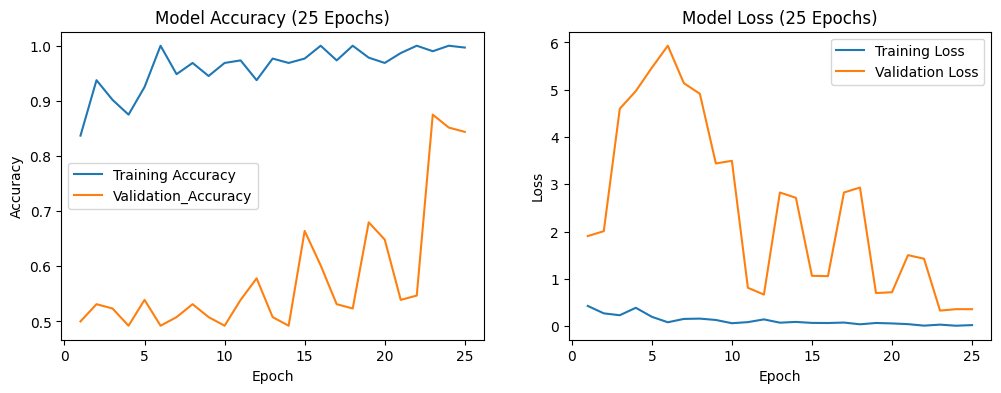

<Figure size 640x480 with 0 Axes>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


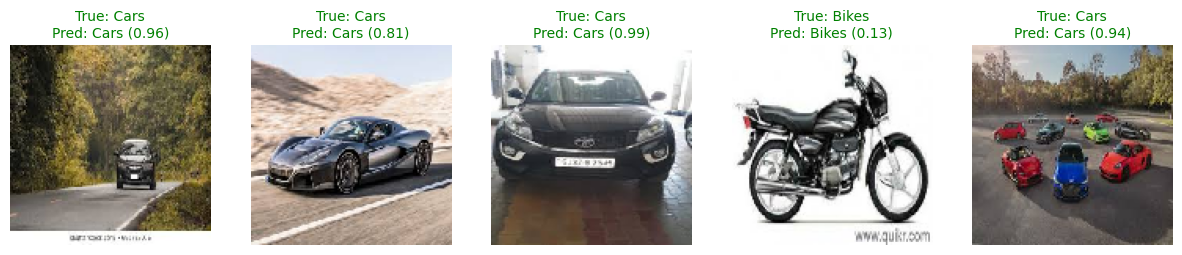

In [ ]:
print("Visualization...")
# combine first 10 epochs (history) and the resumed 15 epochs (history_continued)
all_acc = history.history['accuracy'] + history_continued.history['accuracy']
all_val_acc = history.history['val_accuracy'] + history_continued.history['val_accuracy']
all_loss = history.history['loss'] + history_continued.history['loss']
all_val_loss = history.history['val_loss'] + history_continued.history['val_loss']
epochs_range = range(1, len(all_acc) + 1)

# plot training history
def plot_training_history(acc, val_acc, loss, val_loss, epochs_range):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation_Accuracy')
    plt.title('Model Accuracy (25 Epochs)')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.title('Model Loss (25 Epochs)')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

plot_training_history(all_acc, all_val_acc, all_loss, all_val_loss, epochs_range)

# visualize sample predictions
# use class_labels and validation_generator from the data loading step

class_labels = ['Bikes', 'Cars'] # manually defined on my report
def visualize_predictions(model, generator, class_labels, num_samples=5):
    plt.figure(figsize=(15, 6))
    x, y_true_batch = next(generator)
    x_samples = x[:num_samples]
    y_pred_proba = model.predict(x_samples)

    for i in range(num_samples):
      true_label_index = int(y_true_batch[i])
      pred_proba = y_pred_proba[i][0]
      pred_class_index = 1 if pred_proba > 0.5 else 0

      true_label = class_labels[true_label_index]
      pred_label = class_labels[pred_class_index]

      color = 'green' if true_label == pred_label else 'red'

      plt.subplot(1, num_samples, i + 1)
      plt.imshow(x_samples[i])
      title = f"True: {true_label}\nPred: {pred_label} ({pred_proba:.2f})"
      plt.title(title, color=color, fontsize=10)
      plt.axis('off')
plt.suptitle("Samples Predictions (Confidence Level)", fontsize=10)
plt.show()

visualize_predictions(model, validation_generator, class_labels, num_samples=5)




